In [1]:
import pickle
import numpy as np

In [2]:
with open("train_qa.txt", "rb") as fp:   # Unpickling, read-binary
    train_data =  pickle.load(fp)

In [3]:
with open("test_qa.txt", "rb") as fp:   # Unpickling
    test_data =  pickle.load(fp)

----

## Exploring the Format of the Data

In [4]:
type(test_data)

list

In [5]:
type(train_data)

list

In [6]:
len(test_data)

1000

In [7]:
len(train_data)

10000

- the train data contains 10,000 samples

In [8]:
train_data[50]

(['Mary',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.',
  'Daniel',
  'went',
  'to',
  'the',
  'office',
  '.'],
 ['Is', 'Mary', 'in', 'the', 'bathroom', '?'],
 'yes')

In [9]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [10]:
text=''
print('Story:')
for sent in train_data[99]:
    if sent!='yes' and sent!='no':
        for word in sent:
            if (word!='.'):
                if (word!='?'):
                    text+= word + ' '
                else:
                    print()
                    print('Question:', text[:-1]+word)
                    print()
            else:
                print(text[:-1]+word)
                text=''
    else:
        print('Answer:', sent)

Story:
Daniel grabbed the apple there.
Daniel went to the bedroom.
John moved to the garden.
Sandra journeyed to the office.
Daniel put down the apple.
Mary went to the bedroom.
Mary grabbed the apple there.
Sandra went back to the garden.
Mary went to the kitchen.
Daniel went to the office.

Question: Is Mary in the garden?

Answer: no


- list of tuples
    - tuple contains: story x, question q and answer a

In [11]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [12]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [13]:
train_data[0][2]

'no'

-----

## Setting up Vocabulary of All Words

In [14]:
# Create a set that holds the vocab words
vocab = set()

In [15]:
all_data = test_data + train_data

In [16]:
len(all_data)

11000

In [17]:
set(train_data[0][0]) # story component

{'.',
 'Mary',
 'Sandra',
 'bathroom',
 'bedroom',
 'journeyed',
 'moved',
 'the',
 'to'}

In [18]:
for story, question , answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [19]:
vocab.add('no')
vocab.add('yes')

In [20]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [21]:
vocab_len = len(vocab) + 1 

In [22]:
vocab_len

38

In [23]:
max_story_len = max([len(data[0]) for data in all_data])

In [24]:
max_story_len

156

In [25]:
max_question_len = max([len(data[1]) for data in all_data])

In [26]:
max_question_len

6

## Vectorizing the Data

In [27]:

vocab_size = len(vocab) + 1

-----------

In [28]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [29]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [30]:
tokenizer.word_index

{'there': 1,
 'is': 2,
 'in': 3,
 'bathroom': 4,
 'back': 5,
 'discarded': 6,
 'sandra': 7,
 'bedroom': 8,
 'milk': 9,
 'hallway': 10,
 'no': 11,
 'moved': 12,
 'to': 13,
 'dropped': 14,
 'picked': 15,
 'took': 16,
 'left': 17,
 'football': 18,
 'grabbed': 19,
 'john': 20,
 'down': 21,
 'got': 22,
 '?': 23,
 'journeyed': 24,
 'office': 25,
 'mary': 26,
 'the': 27,
 '.': 28,
 'kitchen': 29,
 'put': 30,
 'up': 31,
 'travelled': 32,
 'yes': 33,
 'daniel': 34,
 'went': 35,
 'garden': 36,
 'apple': 37}

In [31]:
train_story_text = []
train_question_text = []
train_answers = []

for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [32]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [33]:
len(train_story_text)

10000

In [34]:
len(train_story_seq)

10000

In [63]:
word_index = tokenizer.word_index

In [64]:
word_index

{'there': 1,
 'is': 2,
 'in': 3,
 'bathroom': 4,
 'back': 5,
 'discarded': 6,
 'sandra': 7,
 'bedroom': 8,
 'milk': 9,
 'hallway': 10,
 'no': 11,
 'moved': 12,
 'to': 13,
 'dropped': 14,
 'picked': 15,
 'took': 16,
 'left': 17,
 'football': 18,
 'grabbed': 19,
 'john': 20,
 'down': 21,
 'got': 22,
 '?': 23,
 'journeyed': 24,
 'office': 25,
 'mary': 26,
 'the': 27,
 '.': 28,
 'kitchen': 29,
 'put': 30,
 'up': 31,
 'travelled': 32,
 'yes': 33,
 'daniel': 34,
 'went': 35,
 'garden': 36,
 'apple': 37}

### Functionalize Vectorization

In [36]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):
    X = []
    Xq = []
    Y = []
    for story, query, answer in data:   
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]  
        y = np.zeros(vocab_size)  
        y[word_index[answer]] = 1
        X.append(x)
        Xq.append(xq)
        Y.append(y)
    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [37]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [38]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [39]:
inputs_test

array([[ 0,  0,  0, ..., 27,  8, 28],
       [ 0,  0,  0, ..., 27, 36, 28],
       [ 0,  0,  0, ..., 27, 36, 28],
       ...,
       [ 0,  0,  0, ..., 27, 37, 28],
       [ 0,  0,  0, ..., 27, 36, 28],
       [ 0,  0,  0, ..., 37,  1, 28]])

In [40]:
queries_test

array([[ 2, 20,  3, 27, 29, 23],
       [ 2, 20,  3, 27, 29, 23],
       [ 2, 20,  3, 27, 36, 23],
       ...,
       [ 2, 26,  3, 27,  8, 23],
       [ 2,  7,  3, 27, 36, 23],
       [ 2, 26,  3, 27, 36, 23]])

In [41]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
       503.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
       497.,   0.,   0.,   0.,   0.])

In [43]:
tokenizer.word_index['yes']

33

In [44]:
tokenizer.word_index['no']

11

## Creating the Model

In [45]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Input, Activation, Dense, Permute, Dropout
from tensorflow.keras.layers import add, dot, concatenate
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import RMSprop

In [46]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [47]:
embedding_dim = 128

input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim= embedding_dim))
input_encoder_m.add(Dropout(0.3))

In [48]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

In [49]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=embedding_dim,
                               input_length=max_question_len))
question_encoder.add(Dropout(0.3))

### Encode the Sequences

In [50]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

##### Use dot product to compute the match between first input vector seq and the query

In [51]:
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

#### Add this match matrix with the second input vector sequence

In [52]:
response = add([match, input_encoded_c])  
response = Permute((2, 1))(response)  

#### Concatenate

In [53]:
answer = concatenate([response, question_encoded])

In [54]:
answer

<KerasTensor: shape=(None, 6, 284) dtype=float32 (created by layer 'concatenate')>

In [55]:
answer = LSTM(32)(answer)  

In [56]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)  

In [57]:
answer = Activation('softmax')(answer)

model = Model([input_sequence, question], answer)
optimizer = RMSprop(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 156)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, None, 128)    4864        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 6, 128)       4864        input_2[0][0]                    
______________________________________________________________________________________________

In [59]:
import math
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

initial_learning_rate = 0.01
epochs = 120
decay = initial_learning_rate / epochs

def lr_step_decay(epoch, lr):
    drop_rate = 0.5
    epochs_drop = 20
    return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))

learning_rate = LearningRateScheduler(lr_step_decay, verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.66, patience=5, min_lr=0.0001, verbose=1)  # factor by which the learning rate will be reduced. new_lr = lr * factor

In [60]:
history = model.fit([inputs_train, queries_train], answers_train,batch_size=256,epochs=120,validation_data=([inputs_test, queries_test], answers_test))  # , callbacks=[reduce_lr]

Epoch 1/120
40/40 [==============================] - 7s 113ms/step - loss: 0.9289 - accuracy: 0.4887 - val_loss: 0.7173 - val_accuracy: 0.5030
Epoch 2/120
40/40 [==============================] - 4s 102ms/step - loss: 0.7105 - accuracy: 0.4958 - val_loss: 0.7253 - val_accuracy: 0.4970
Epoch 3/120
40/40 [==============================] - 4s 103ms/step - loss: 0.7008 - accuracy: 0.5110 - val_loss: 0.8422 - val_accuracy: 0.5030
Epoch 4/120
40/40 [==============================] - 4s 104ms/step - loss: 0.7053 - accuracy: 0.4933 - val_loss: 0.6950 - val_accuracy: 0.4970
Epoch 5/120
40/40 [==============================] - 5s 119ms/step - loss: 0.6982 - accuracy: 0.4992 - val_loss: 0.7147 - val_accuracy: 0.5030
Epoch 6/120
40/40 [==============================] - 5s 128ms/step - loss: 0.6980 - accuracy: 0.5019 - val_loss: 0.7108 - val_accuracy: 0.4970
Epoch 7/120
40/40 [==============================] - 5s 124ms/step - loss: 0.6611 - accuracy: 0.5813 - val_loss: 0.5195 - val_accuracy: 0.7560

### Saving the Model

In [61]:
filename = 'QandA.h5'
model.save(filename)

C:\Users\hiten_t0xw2z5\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [94]:
with open("word_dict.pkl", 'wb') as f:
    pickle.dump(word_index, f)

## Evaluating the Model

### Plotting Out Training History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


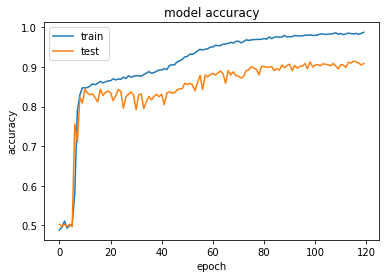

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy.png', dpi=180, facecolor='white')
plt.show()

### Evaluating on Given Test Set

In [71]:
pred_results = model.predict(([inputs_test, queries_test]))

In [72]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [73]:
story =' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [74]:
query = ' '.join(word for word in test_data[0][1])
print(query)

Is John in the kitchen ?


In [75]:
print("True Test Answer from Data is:",test_data[0][2])

True Test Answer from Data is: no


In [76]:
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  1.0
